![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 7 - Parametric Estimation</center>
### <center> Maximum A Posteriori</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/07_ParametricEstimation/MainMAP.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

#### Generate some data from:
$$\mu\sim\mathcal{N}\left(10,\sigma_{\mu}^{2}\right)$$
$$X|\mu\sim\mathcal{N}\left(\mu,\sigma_{x}^{2}\right)$$

In [2]:
N  = 1000
µ0 = 9
vZ = np.random.randn(N) + µ0

#### Plot estimation function:

In [5]:
from scipy.stats import norm

def PlotEstimation(ß=1, N=100):
    
    if ß <= 0:
        ß = 0.0001
    if N == 0:
        N = 1
    
    vX      = vZ[:N]
    meanX   = np.mean(vX)
    vRange  = [5, 13]
    vMu     = np.linspace(vRange[0], vRange[1], 1001)
    vBins   = np.linspace(vRange[0], vRange[1], max(int(np.sqrt(N)), 5))
    vPdf    = norm.pdf(vMu, 10, np.sqrt(1/ß))
    vPdf   /= np.max(vPdf)
    
    µMAP    = (10 * ß + N * meanX) / (ß + N)
    
    plt.figure (figsize=(16, 8))
    plt.hist   (vX, bins=vBins, facecolor='blue', alpha=0.5, edgecolor='k', label='$x_i$')
    plt.plot   (vMu, vPdf * plt.ylim()[1],  color='g', linewidth=3,         label=r'$f_{\mu}\left(\mu\right)$')
    plt.axvline(x=µMAP,  linewidth=3, color='r', linestyle='-',             label='$\hat{\mu}_{\mathrm{MAP}}$')
    plt.axvline(x=meanX, linewidth=3, color='b', linestyle='--',            label='$\overline{x}$')
    plt.title  (r'$\beta = ' + str(ß) + '$')
    plt.legend ()    

#### MAP estimator:
$$\boxed{\hat{\mu}_{\mathrm{MAP}}=\frac{10\beta+N\overline{x}}{\beta+N}},\qquad\overline{x}=\frac{1}{N}\sum_{i=1}^{N}x_{i}, \qquad\beta:=\frac{\sigma_{x}^{2}}{\sigma_{\mu}^{2}}$$
$\beta\to0$: ignore prior  
$\beta\to\infty$: ignore observations 

In [6]:
from ipywidgets import interact, FloatSlider, IntSlider, Layout

ßSlider = FloatSlider(min=0, max=1000, step=10, value=0,   layout=Layout(width='80%'))
nSlider = IntSlider  (min=0, max=1000, step=25, value=100, layout=Layout(width='80%'))
interact(PlotEstimation, ß=ßSlider, N=nSlider)
plt.show()

interactive(children=(FloatSlider(value=0.0, description='ß', layout=Layout(width='80%'), max=1000.0, step=10.…

### (Advanced) exercise
Consider the following model:
$$y_{t}=x_{t}+n_{t}$$
where $x$ is the signal of interest and $n$ is Gaussian noise:
$$n_{t}\sim\mathcal{N}\left(0,\sigma_{n}^{2}\right)$$
In vector form we write:
$$\boldsymbol{y}=\boldsymbol{x}+\boldsymbol{n}\in\mathbb{R}^{N}$$


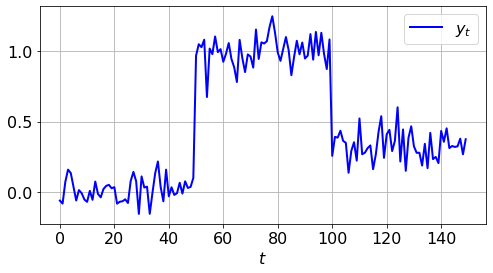

In [15]:
vX = np.concatenate([np.zeros(50), np.ones(50), 1/3 * np.ones(50)])
N  = len(vX)
vY = vX + np.random.randn(N) / 10

plt.figure(figsize=(8,4))
plt.plot  (vY, c='b', lw=2, label='$y_t$')
plt.xlabel('$t$')
plt.legend()
plt.grid  ()
plt.show  ()

From the figure we assume $x$ is piece-wise constant.
* The goal is to estimate $x$ from $y$.
* To obtained a piece-wise constant vector, we can use the following prior:
$$f_{x}\left(\boldsymbol{x}\right)=C\cdot\exp\left(-\frac{\left\Vert \boldsymbol{D}\boldsymbol{x}\right\Vert _{1}}{\sigma_{x}^{2}}\right)$$
where $\boldsymbol{D}$ is the discrete derivative matrix:
$$\boldsymbol{D}=\left[\begin{matrix}-1 & 1\\
 & -1 & 1\\
 &  & \ddots & \ddots\\
 &  &  & -1 & 1
\end{matrix}\right]\in\mathbb{R}^{N-1\times N},\qquad\qquad\underbrace{\left[\begin{matrix}-1 & 1\\
 & -1 & 1\\
 &  & \ddots & \ddots\\
 &  &  & -1 & 1
\end{matrix}\right]}_{=\boldsymbol{D}}\left[\begin{matrix}x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{matrix}\right]=\left[\begin{matrix}x_{2}-x_{1}\\
x_{3}-x_{2}\\
\vdots\\
x_{N}-x_{N-1}
\end{matrix}\right]$$

### Questions
* The MAP estimator is given by:
$$\hat{\boldsymbol{x}}_{\text{MAP}}=\arg\max_{\boldsymbol{x}}f_{y|x}\left(\boldsymbol{y}|\boldsymbol{x}\right)f_{x}\left(\boldsymbol{x}\right)$$
Explain why we can write:
$$\hat{\boldsymbol{x}}_{\text{MAP}}=\arg\max_{\boldsymbol{x}}\log\left(f_{y|x}\left(\boldsymbol{y}|\boldsymbol{x}\right)\right)+\log\left(f_{x}\left(\boldsymbol{x}\right)\right)$$
---

* The noise is Gaussian:
$$\boldsymbol{n}\sim\mathcal{N}\left(\boldsymbol{0},\sigma_{n}^{2}\boldsymbol{I}\right)$$
Explain why:
$$\boldsymbol{y}|\boldsymbol{x}\sim\mathcal{N}\left(\boldsymbol{x},\sigma_{n}^{2}\boldsymbol{I}\right)$$
---

* From the bullet above we have:
$$f_{y|x}\left(\boldsymbol{y}|\boldsymbol{x}\right)=\tilde{C}\exp\left(-\frac{\left\Vert \boldsymbol{y}-\boldsymbol{x}\right\Vert _{2}^{2}}{2\sigma_{n}^{2}}\right)$$
Show that
1.
$$\log\left(f_{x}\left(\boldsymbol{x}\right)\right)=\log\left(C\right)-\frac{\left\Vert \boldsymbol{D}\boldsymbol{x}\right\Vert }{\sigma_{x}^{2}}$$
2.
$$\log\left(f_{y|x}\left(\boldsymbol{y}|\boldsymbol{x}\right)\right)=\log\left(\tilde{C}\right)-\frac{\left\Vert \boldsymbol{y}-\boldsymbol{x}\right\Vert _{2}^{2}}{2\sigma_{n}^{2}}$$
---

* Conclude that:
$$\implies\boxed{\hat{\boldsymbol{x}}_{\text{MAP}}=\arg\min_{\boldsymbol{x}}\left\Vert \boldsymbol{y}-\boldsymbol{x}\right\Vert _{2}^{2}+\beta\left\Vert \boldsymbol{D}\boldsymbol{x}\right\Vert _{1}}$$
Write the correct expression of $\beta$
---

* Use `scipy.optimize.minimize` to solve the optimization problem.
* play with the value of $\beta$, check what happens in the extreme cases.
* What happens when you change the $L^1$ norm to $L^2$ norm?  

**Hints**:    
1. Use `np.diff` to compute $\boldsymbol{D}\boldsymbol{x}$.
2. Use `np.linalg.norm` to compute the $L^1$ and $L^2$ norms.

In [16]:
from scipy.optimize import minimize
from numpy.linalg   import norm

#================================================#
def Dx(vX):
    #-- Implement this function (in one line)!
    ???
#================================================#

#-- Set ß:
ß = ???
#================================================#
def Objective(vX):
    #-- Implement this function (in one line)!
    ???
#================================================#

vX0 = ??? #-- set initial point

#-- Solve the optimization:
oSol  = minimize(Objective, vX0)
vHatX = oSol.x

SyntaxError: invalid syntax (<ipython-input-16-5e44266500b5>, line 11)

NameError: name 'vHatX' is not defined

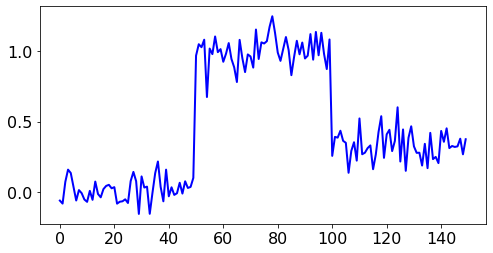

In [17]:
#-- Plots:
plt.figure(figsize=(8,4))
plt.plot  (vY,    c='b', lw=2, label='$y_t$')
plt.plot  (vHatX, c='r', lw=2, label='$\hat{x}_t$')
plt.xlabel('$t$')
plt.legend()
plt.grid  ()
plt.show  ()

In [ ]:
# np.diff(vX)
# norm(vY - vX)**2 + ß * norm(Dx(vX), ord=1)
# vX0   = vY